# Manisha Pednekar NLP Homework 2

### <font color=blue> Importing Required Libraries </font>

In [1]:
import requests
from bs4 import BeautifulSoup
import wget


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re #for line 51 and 52
import os
import math

import nltk

from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader


### <font color=blue> Web scraping </font>
- Parse the Gutenber Project site(http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)) for all ".extiw" tags to get URL for each book to the next webpage which contains different download format(html, kindle, pdf,txt etc) options for each book.
- Extract "Plain Text UTF-8" download link from this second consequent webpage for each book.
- Download the files using wget locally to a directory named "corpus".

In [2]:
page = requests.get('http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)')


soup = BeautifulSoup(page.text, 'lxml')

#soup.select('.extiw')

bookNames = []
links = []
ebks = []
bkUrls = []

plainTextUrls = []

for item in soup.select('.extiw'):
        lnk = item['href']
        bkName = item.text
        #print(bkName)
        #bookNames.append(bkName)
        links.append(item['href'])
        
        
        pageLnk = requests.get('http:'+lnk)
        soup2 = BeautifulSoup(pageLnk.text, 'html.parser')
        hrefTag = soup2.find_all(href= True, text = 'Plain Text UTF-8')
        updateUrl = 'http:' + hrefTag[0].attrs['href']
        plainTextUrls.append(updateUrl)
        
        # code from https://stackoverflow.com/questions/5843518/remove-all-special-characters-
        #punctuation-and-spaces-from-string To Remove all special characters, punctuation and 
        #spaces from string
        bkName = ''.join(filter(str.isalnum, bkName))
        if(len(bkName)> 40):
            bkName = bkName[:40]
        
        bookNames.append(bkName)

In [10]:
print("Book count: "+ str(len(bookNames)) + "   URL count: " + str(len(plainTextUrls)) )

Book count: 104   URL count: 104


In [7]:
len(bookNames)

104

In [8]:
len(plainTextUrls) 

104

### <font color=blue> There are 104 books to download. </font>
- downloading 104 .txt files to a folder called "corpus".

In [11]:
print('The files download begin....')
corpusDir = "C:/Users/Sohum Pednekar/Documents/NLPunit2/corpus"
os.chdir(corpusDir)

errorDetail = []

for i in range(0, len(plainTextUrls)) : 
    
    url = plainTextUrls[i]
    file_name = bookNames[i] + '.txt'
    
    try :
        wget.download(url, file_name)
        
    except Exception as e:
        print ("Error({0}): {1}".format(e.errno, e.strerror))
        errorDetail.append(plainTextUrls[i] + "for Book: " + bookNames[i])
        #print('Error code: ', e.code)
print(".....\n.....\n.....")            
print('The files downloads complete.')


The files download begin....
.....
.....
.....
The files downloads complete.


### <font color=blue>Removing the Licence information from the downloaded texts </font>

In [12]:
def removeLicense(textStr):
###code taken from https://stackoverflow.com/questions/44635103/what-to-do-when-re-findall-does-not-find-the-pattern    
    pattern1 = "\*\*\* START "
    pattern2 = "\*\*\*START "
    pattern3 = '\*\*\* END '
    pattern4 = '\*\*\*END '
    
    try :
        re.findall('\*\*\* START OF ', textStr)[0]
        i= [m.start() for m in re.finditer('\*\*\* START ', textStr)]
        #                                   \*\*\* START 
        starttx= i[0]
        #print(starttx)
    except IndexError:
        #re.findall('\*\*\*START OF ', txt)[0]
        i= [m.start() for m in re.finditer('\*\*\*START ', textStr)]
        starttx= i[0]
        #print(starttx)
    try :
        re.findall('\*\*\* END OF ', textStr)[0]
        j= [m.start() for m in re.finditer('\*\*\* END ', textStr)]
        endtx= j[0]
        #print(endtx)
    except IndexError:
        j= [m.start() for m in re.finditer('\*\*\*END ', textStr)]
        endtx= j[0]
        #print(endtx)
        
    textStr = textStr[starttx:endtx]
    return textStr


#corpusDir = "C:/Manisha/NLP/Unit2/corpus"
os.chdir(corpusDir)


cleanCorpus = "./noLicenseTxt/"
filelist = os.listdir(os.getcwd())
for i in filelist:
    if i.endswith('.txt'):
        try:
            print(i)
            txt= open(i, encoding="utf8", errors='ignore').read()
            cleanTxt = removeLicense(txt)
        except Exception as e:
            print('While reading Error code: ', e.code)
    
        try:
            
            with open(cleanCorpus + i, 'w', encoding='utf-8') as writer:
                    writer.write(cleanTxt)
                    writer.close()
        except Exception as e:
            print('While writing Error code: ', e.code)

ABookofNaturalHistoryYoungFolksLibraryVo.txt
ACatechismofFamiliarThingsTheirHistoryan.txt
AFirstSpanishReader.txt
AHistoryoftheMcGuffeyReaders.txt
AHundredAnecdotesofAnimals.txt
ALittleBookforALittleCook.txt
AManualofPronunciationForPracticalUseinS.txt
AModernHistoryFromtheTimeofLuthertotheFa.txt
AmongtheFarmyardPeople.txt
AnecdotesoftheHabitsandInstinctofAnimals.txt
AnElementarySpanishReader.txt
AnimalHeroes.txt
APrimaryReaderOldtimeStoriesFairyTalesan.txt
ASchoolHistoryoftheUnitedStates.txt
BirdDayHowtoprepareforit.txt
BookaboutAnimals.txt
BoyBlueandhisfriendsSchooled.txt
CampingForBoys.txt
CarlandtheCottonGin.txt
ChamberssElementaryScienceReadersBookI.txt
ChatterboxStoriesofNaturalHistory.txt
ChildrensClassicsinDramaticFormBookTwo.txt
ChildsBookofWaterBirds.txt
CommercialGeographyABookforHighSchoolsCo.txt
Contesethistoriettesàlusagedesjeunesenfa.txt
CountryWalksofaNaturalistwithHisChildren.txt
DeLaSalleFifthReader.txt
Denmark.txt
DrScuddersTalesforLittleReadersAbouttheH.txt
Electric

## 1.	In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

## 2.	After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

### Cleaning text further to generate accurate scores for normalized longest word length, normalised vocabulary size, Lexical diversity and Text diffculty score
- Tokenized the book text(since the texts are in UTF-8 format)
- Convert all words to lower case
- remove all words that are not alphabetic
- Compute the longest word for each text
- Compute Vocabulary size from set of unique words of each text
- Compute Lexical diversity for each text

In [13]:
def lexical_diversity(text):
    tokens = len(text)
    types = len(set(text))
    divScore = types / tokens
    return divScore

def longestWd(words) :    
    uniqueWords = set(words)    
    longWords = [w for w in uniqueWords if len(w) > 6]
    ### code taken from https://www.programcreek.com/python/example/16275/nltk.FreqDist
    longest = sorted(longWords, key = len, reverse = True)[0]
    return longest

def vocab_size(words):
    vocabSize = len(set(words))
    return vocabSize

#def cleanText(textStr):
flag = 0
fileNm = []
vocabList = []
lexDivList = []
longestWdLenList = []
corpusDir = "C:/Users/Sohum Pednekar/Documents/NLPunit2/corpus/noLicenseTxt"
os.chdir(corpusDir)
ret = {}
filelist = os.listdir(os.getcwd())
for i in filelist:
    if i.endswith('.txt'):
        try:
            
            file = open(i, encoding="utf8", errors='ignore')
            text = file.read()
            file.close()
        except Exception as e:
            print('While reading Error code: ', e.code)
            #pass

        tokens = word_tokenize(text)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
# remove all tokens that are not alphabetic
        words = [word for word in tokens if word.isalpha()]
        vocabSize = vocab_size(words)
        longestWord = longestWd(words)
        lenLongest = len(longestWord)
        #print(words[100:130])
        lexDiv = lexical_diversity(words)
    
        ret[flag]= {'BookName': i,'VocabSize': vocabSize,'LongestWordLen': lenLongest, 'LexDiv': lexDiv}
        #print(flag)
        
        #vocabLDCombined = vocabSize / lexDiv
    
        fileNm.append(i)
        lexDivList.append(round(lexDiv, 4))
        vocabList.append(vocabSize)
        longestWdLenList.append(lenLongest)
        flag = flag +1


In [36]:
print(min(longestWdLenList))
print(max(longestWdLenList))

print(min(vocabList))
print(max(vocabList))


12
23
184
13529


In [14]:
#1. Now create a pandas df from the dictionary
df = pd.DataFrame(ret)
df = df.transpose()

## Longest word length, vocabulary size, Lexical diversity for each book

- Non-English language books have longest words than English books
- "In Dutch" book contain the longest word which is 23 characters long.
- Subsequently "Denmark" Danish language book and "Leçons de cosmographie by Adrien Guilmin" french book contains longer words.
- "McGuffey's Sixth Eclectic Reader" has maximum vocab size of 13,529 unique words.
- Book named "Little Present" as the lowest number(184) of unique words.

In [15]:
df

,BookName,LexDiv,LongestWordLen,VocabSize
0,ABookofNaturalHistoryYoungFolksLibraryVo.txt,0.091225,18,9319
1,ACatechismofFamiliarThingsTheirHistoryan.txt,0.105396,16,6617
2,AFirstSpanishReader.txt,0.226662,17,7085
3,AHistoryoftheMcGuffeyReaders.txt,0.183627,15,3147
4,AHundredAnecdotesofAnimals.txt,0.180469,16,3722
5,ALittleBookforALittleCook.txt,0.314613,13,577
6,AManualofPronunciationForPracticalUseinS.txt,0.581554,14,2043
7,AModernHistoryFromtheTimeofLuthertotheFa.txt,0.0596807,18,12443
8,AmongtheFarmyardPeople.txt,0.0672819,14,2632
9,AnecdotesoftheHabitsandInstinctofAnimals.txt,0.0899836,16,9131


## Normalized Longest word length, Normalized vocabulary size for each book
- Min-Max scaling was used to normalize Longest Word Length and Vocabulary Size Scores.
- Mix-Max scaling:  x - min(x)  / max(x) - min(x)

In [16]:
# Min Max scaling of LongestWordLen
x, y = df.LongestWordLen.min(), df.LongestWordLen.max()
df['NormLongWord'] = (df.LongestWordLen - x) / (y - x)

# Min Max scaling of VocabSize
x, y = df.VocabSize.min(), df.VocabSize.max()
df['NormVocabSize'] = (df.VocabSize - x) / (y - x)

## 3.	Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

## Text difficulty score
- Text difficulty score = square root( square(NormLongestWord) + square(NormVocabSize) + square(LexicalDiversity) )

- TDS =  $\sqrt{NormLongestWord^2 + NormVocabSize^2 + LexicalDiversity^2}$


### Vocabulary size represents the number of unique types. VocabSize plot show that the vocabulary size increases monotonously as the text grade level increases which is observed in McGuffey's graded readers and New National Readers books. Thus, this measure meets the expectation that the richness of the vocabulary should increase as the grade level of the text increase. 

### Plots shows that Non-English books have longest words than English books. But the preface of english graded books contains longest word in the Mcguffey's graded book. e.g. McGuffey's First Reader's longest word is "Representation" which is embedded in the Preface. Thus Longest word length metric also does not truly capture the reading difficulty for the Gutenberg's graded texts. All the texts need futher finer cleaning to include only the book content (which student should read) to capture the word length metric better.

### The Lexical Diversity decreases as the text grade level increases as seen in McGuffey's readers (Homework 1 observations). Type/token ratio does not capture the richness of the vocabulary. Both the numerator and the denominator increase with each new word introduced thus high frequency words (e.g. stop words) increase denominator disproportionately. Thus, the lexical diversity is not a good measure of overall reading difficulty of the text. 

### Text Difficulty score increases monotonously with increasing grade level of the texts as seen in plots below thus capturing the reading difficulty level of the text succinctly with higher sensitivity than long word lengths or vocab size or Lexical Diversity alone. We observed that the TDS calculated as per above formula meets the expectation that the richness of the vocabulary should increase as the grade level of the text increase thus it is a better measure than the other 3 measures. ¶

In [17]:
#################### TDS FORMULA #################################################################
# Text difficulty score = square root( square(NormLongestWord) + square(NormVocabSize) + square(LexicalDiversity) )
### combined Text difficulty score

df['TxtDifficulty'] = df.NormLongWord**2 + df.NormVocabSize**2 + df.LexDiv**2
df['sqrtTDS'] = df['TxtDifficulty']** .5
#print(df[['LexDiv','TxtDifficulty', 'sqrtTDS']])


In [18]:
### Short book titles creation to fit on the plots
df['ShortTitle'] = [txt[:25] for txt in df['BookName']]

### I tried PCA as an unsupervised technique for data visualization and to preprocess and combine vocab size, long word length and Lex Diversity scores before creating TDS formula. The PCA was ran on the dataset containing all the 104 text data points for these features: vocab size, long word length and Lex Diversity. Eigenvectors represent the principal components and provide a means to understand the direction of the data. Corresponding eigenvalues represent how much variance there is in the data in that direction. Principal component 1 captures the most variance  74 % and Principal component 2 captures 16% of the variance, thus PC1 and PC2 describes 90% of variation within the data. I plotted PC1 against PC2 to understand the data better.

[0.74075644 0.16716956]
[[ 0.8819992   0.42980908 -0.19323965]
 [-0.43224616  0.90120222  0.03158839]]


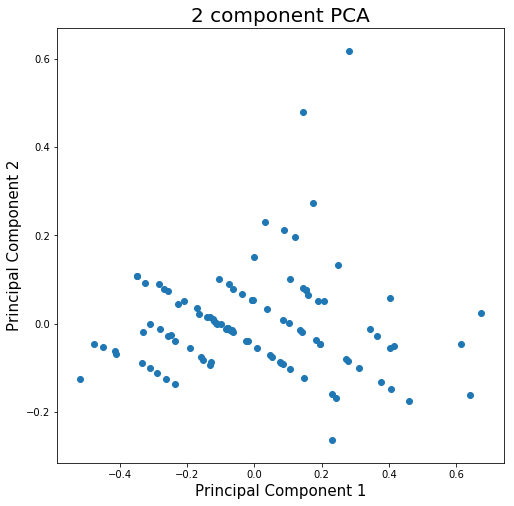

In [19]:
##################################################################
#   PCA (Principal component analysis) to see whether we could use Principal components 
#   as the Combined metrix for text difficulty score
##################################################################

df2 = df[['NormVocabSize', 'NormLongWord', 'LexDiv']].copy()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PCAs = pca.fit(df2)
PCAtrasform = pca.fit_transform(df2)
print(PCAs.explained_variance_ratio_)
print(PCAs.components_)
# =============================================================================
principalDf = pd.DataFrame(data =PCAtrasform, columns = ['p1', 'p2'])
 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
 
plt.scatter(principalDf['p1'], principalDf['p2'])
plt.show()

In [20]:
#### plots 
df3 = df[['BookName','ShortTitle', 'NormVocabSize', 'NormLongWord', 'sqrtTDS']].copy()
df4 = df3.sort_values(by=['NormVocabSize'])
df5 = df3.sort_values(by=['NormLongWord'])
df6 = df3.sort_values(by=['sqrtTDS'])


## Plots of normalized VocabSize, Long Word lengths and TDS metrics for all 104 books

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


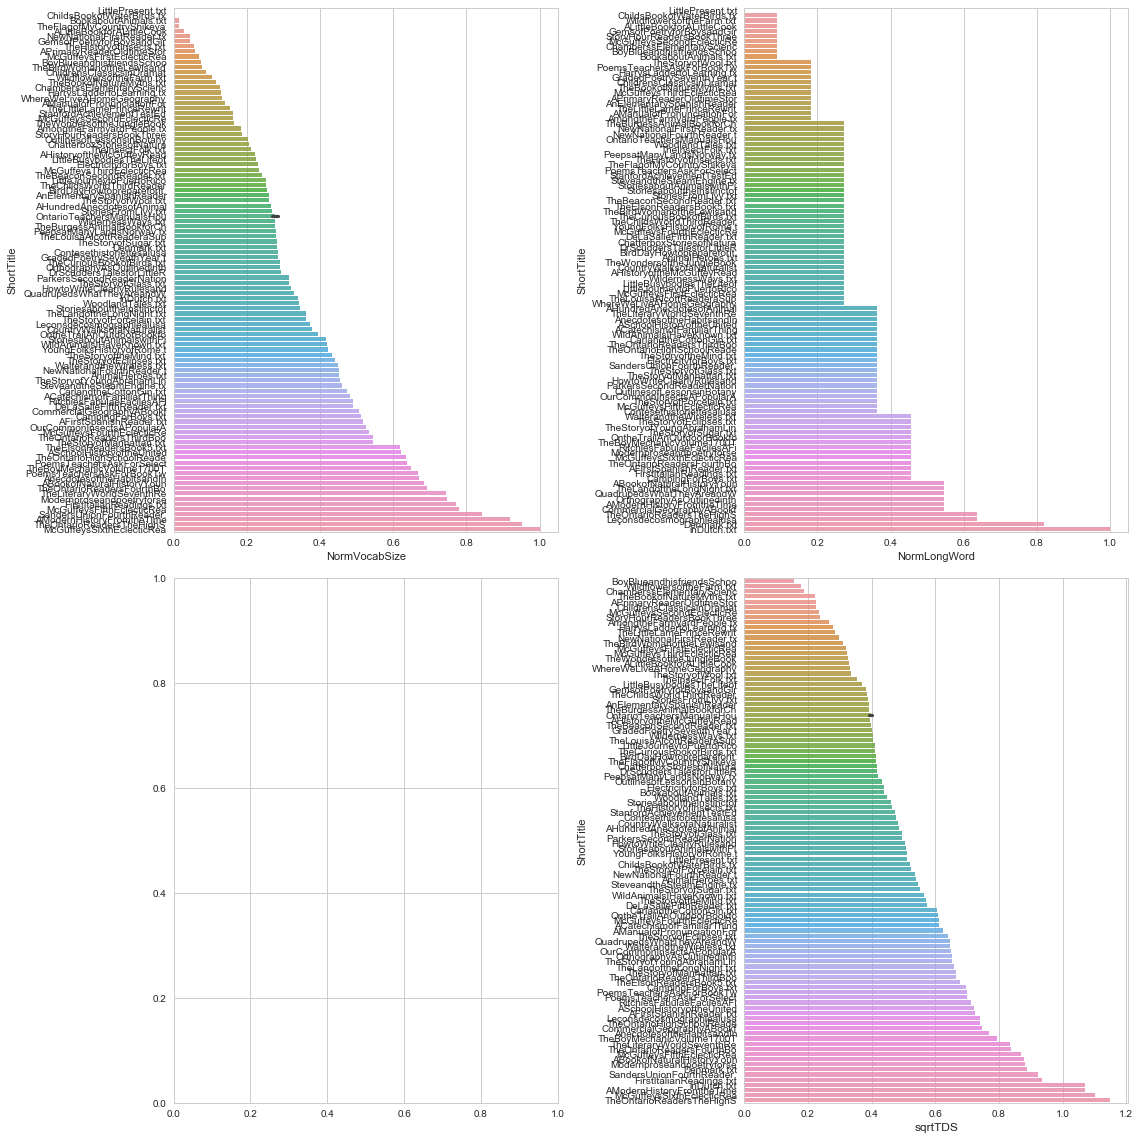

In [28]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*8), squeeze=False)

sns.set(style="whitegrid")
sns.barplot(x = 'NormVocabSize', y = 'ShortTitle', data = df4, alpha=0.9,ax = axs[0][0])

sns.barplot(x = 'NormLongWord', y = 'ShortTitle', data = df5, alpha=0.9,ax = axs[0][1])
#plt.xlabel('vocab size', fontsize=12)
sns.barplot(x = 'sqrtTDS', y = 'ShortTitle', data = df6, alpha=0.9,ax = axs[1][1])
plt.xlabel('sqrtTDS', fontsize=12)

plt.tight_layout()    
plt.show()


#  <font color=red> Individual Plots of the metrics for all 104 books</font>

### Normalized Vocab score plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


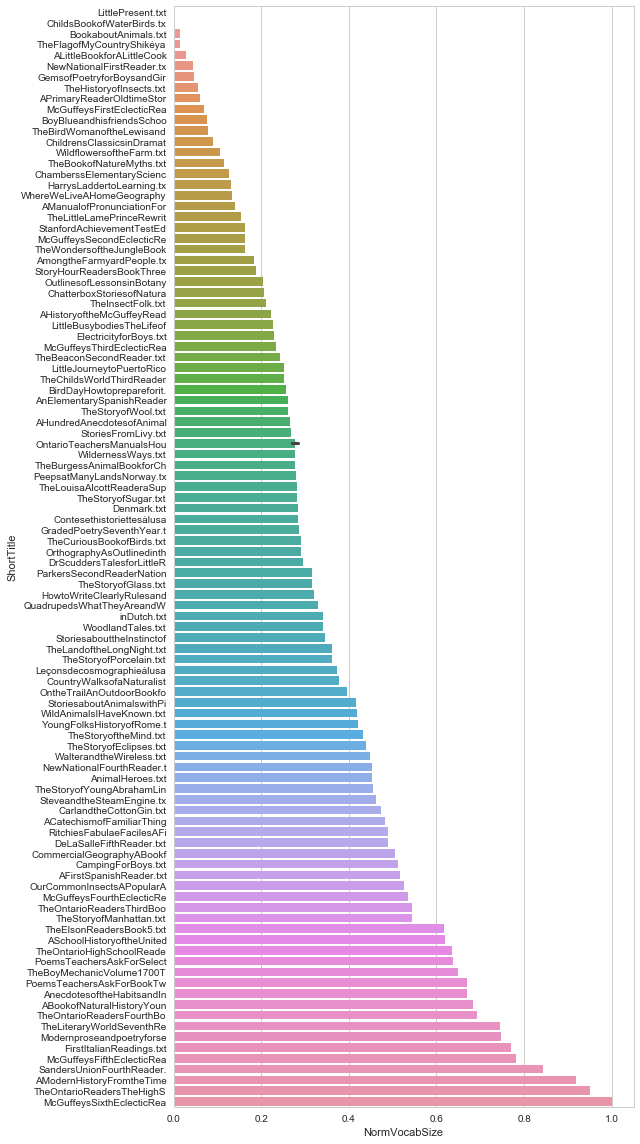

In [27]:
%matplotlib inline
plt.figure(figsize=(9, 16))
sns.barplot(x = 'NormVocabSize', y = 'ShortTitle', data = df4)


## Normalized long word length score plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


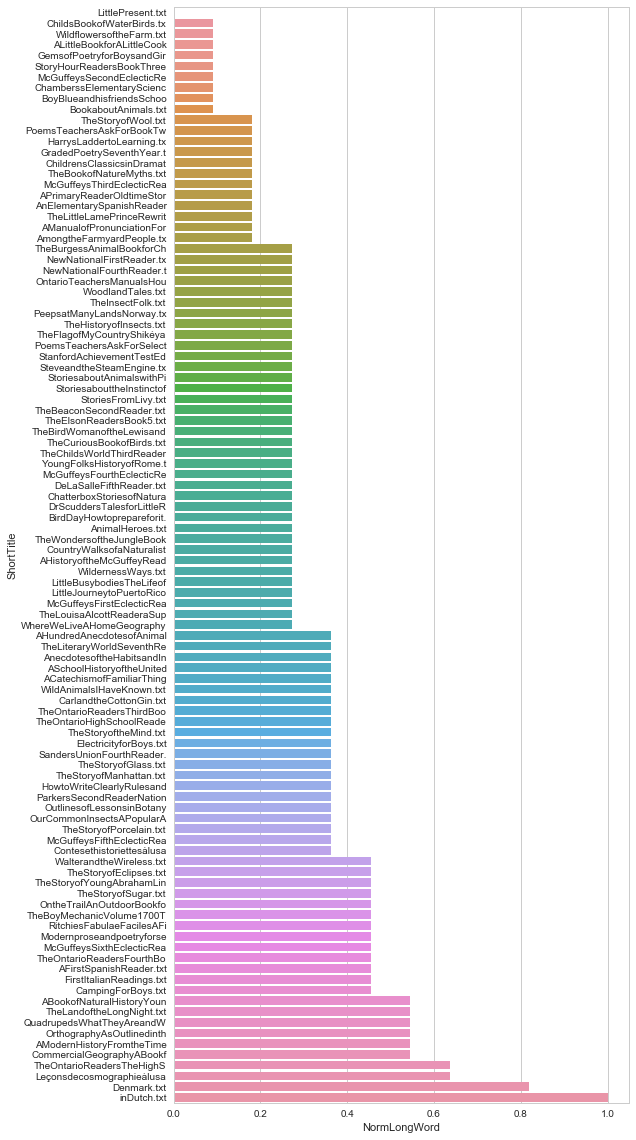

In [29]:
plt.figure(figsize=(9, 16))
sns.barplot(x = 'NormLongWord', y = 'ShortTitle', data = df5)


## Text Difficulty Score plot

Text(0.5,0,'Text Difficulty Score')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


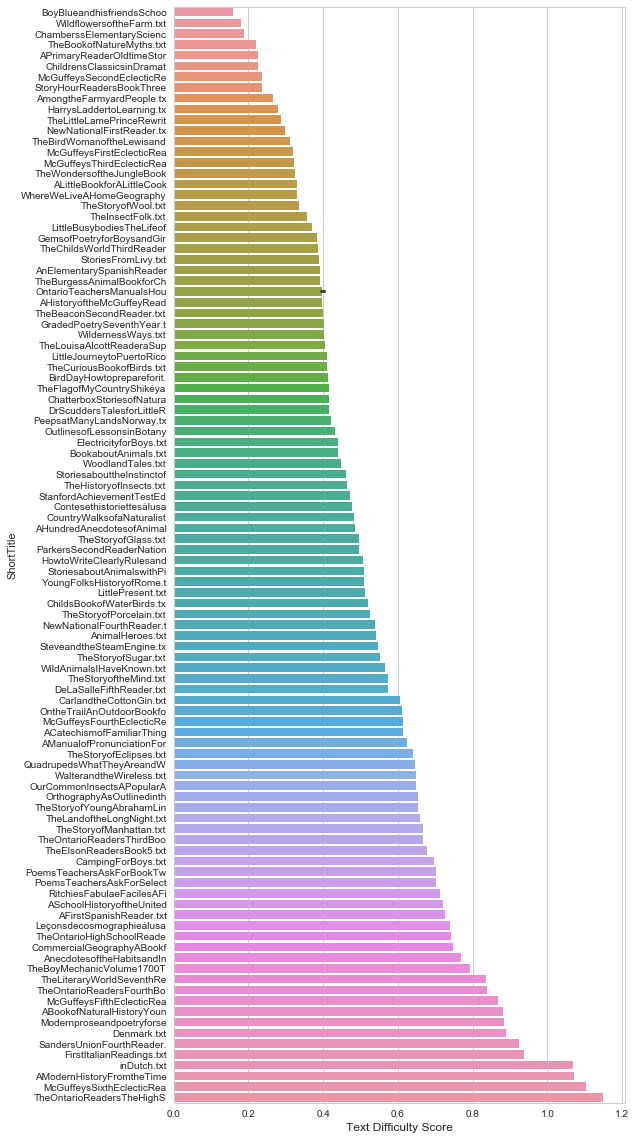

In [30]:
plt.figure(figsize=(9, 16))
sns.barplot(x = 'sqrtTDS', y = 'ShortTitle', data = df6)
plt.xlabel('Text Difficulty Score', fontsize=12)

#  <font color=red> Plots of normalized VocabSize, Long Word lengths and TDS metrics for selected graded books</font>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


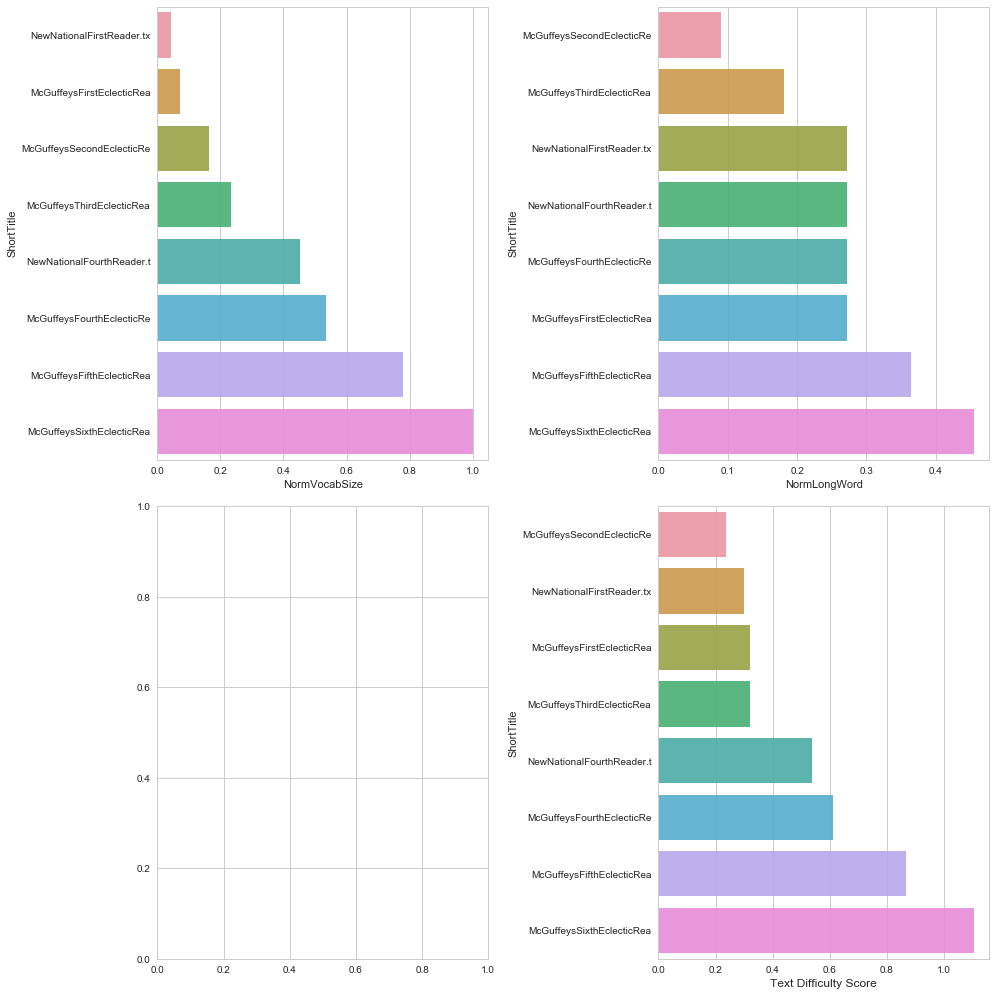

In [32]:
#### only graded books
selectBooks = [
    "McGuffeysFirstEclecticReaderRevisedEditi.txt", 
    "McGuffeysSecondEclecticReader.txt", 
    "McGuffeysThirdEclecticReader.txt", 
    "McGuffeysFourthEclecticReader.txt", 
    "McGuffeysFifthEclecticReader.txt", 
    "McGuffeysSixthEclecticReader.txt",
    "NewNationalFirstReader.txt",
    "NewNationalFourthReader.txt"
]

dfVocabSubset = df4.loc[df4['BookName'].isin(selectBooks)]
dfWordLenSubset = df5.loc[df5['BookName'].isin(selectBooks)]
dfTDSSubset = df6.loc[df6['BookName'].isin(selectBooks)]

dfVocabSubset = dfVocabSubset.sort_values(by=['NormVocabSize'])
dfWordLenSubset = dfWordLenSubset.sort_values(by=['NormLongWord'])
dfTDSSubset = dfTDSSubset.sort_values(by=['sqrtTDS'])
######################################################
####Selected graded books plots##################
#######################################################
###Plots 3 plots


nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*7), squeeze=False)

sns.set(style="whitegrid")
sns.barplot(x = 'NormVocabSize', y = 'ShortTitle', data = dfVocabSubset, alpha=0.9,ax = axs[0][0])

sns.barplot(x = 'NormLongWord', y = 'ShortTitle', data = dfWordLenSubset, alpha=0.9,ax = axs[0][1])
#plt.xlabel('vocab size', fontsize=12)
sns.barplot(x = 'sqrtTDS', y = 'ShortTitle', data = dfTDSSubset, alpha=0.9,ax = axs[1][1])
plt.xlabel('Text Difficulty Score', fontsize=12)

plt.tight_layout()    
plt.show()
